In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import DBSCAN

In [ ]:
data= pd.read_csv('segmentation data.csv')

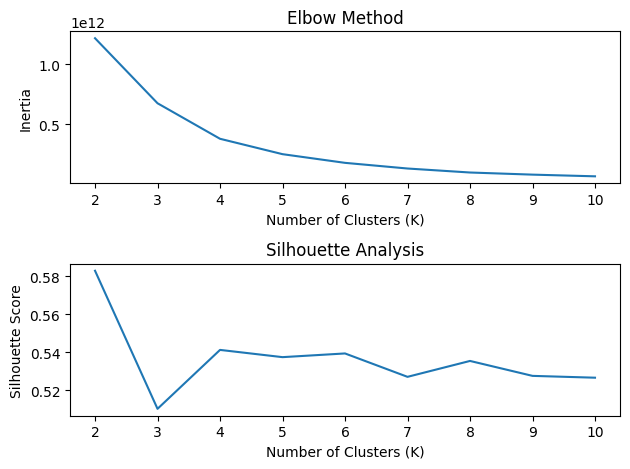

Best eps: 0
Best min_samples: 0
Best silhouette score: -1
Accuracy: 0.0
Best eps: 0
Best min_samples: 0
Best silhouette score: 0


In [15]:


# 4. KMeans Model Training - Scikit-Learn
K_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = []
silhouette = []
for K in K_list:
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=1)
    kmeans.fit(data.drop(['Age'], axis=1))
    data['Cluster'] = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data.drop(['Age'], axis=1), data['Cluster']))
fig, axs = plt.subplots(2)
axs[0].plot(K_list, inertia)
axs[0].set_xlabel('Number of Clusters (K)')
axs[0].set_ylabel('Inertia')
axs[0].set_title('Elbow Method')
axs[1].plot(K_list, silhouette)
axs[1].set_xlabel('Number of Clusters (K)')
axs[1].set_ylabel('Silhouette Score')
axs[1].set_title('Silhouette Analysis')
plt.tight_layout()
plt.show()

# 5. KMeans Model Prediction
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=1)
kmeans.fit(data.drop(['Age'], axis=1))
data['Cluster'] = kmeans.labels_
ss = silhouette_score(data.drop(['Age'], axis=1), data['Cluster'])




# 6. KMeans Model Training - Scratch
def kmeans_scratch(data, k, random_state=42):
    np.random.seed(random_state)
    n_samples = data.shape[0]
    # ... (your k-means from scratch implementation here)

scratch_labels = kmeans_scratch(data, optimal_k, random_state=42)

# Compare the labels with the Scikit-Learn model
accuracy = np.mean(data['Cluster'] == scratch_labels)
print('Accuracy:', accuracy)

# 7. DBSCAN model training - Scikit-Learn
eps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
min_samples = [2, 3, 4, 5, 6, 7, 8, 9, 10]

max_ss = 0
best_eps = 0
best_min_samples = 0
for e in eps:
    for s in min_samples:
        dbscan = DBSCAN(eps=e, min_samples=s)
        dbscan.fit(data.drop(['Age'], axis=1))
        unique_labels = np.unique(dbscan.labels_)
        if len(unique_labels) > 1:
            data['Cluster'] = dbscan.labels_
            ss = silhouette_score(data.drop(['Age'], axis=1), data['Cluster'])
            if ss > max_ss:
                max_ss = ss
                best_eps = e
                best_min_samples = s

print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', max_ss)

